# MD Analysis package testing

Source: https://github.com/MDAnalysis/mdanalysis  
Tutorial: https://www.mdanalysis.org/MDAnalysisTutorial/  
Example Notebooks: https://nbviewer.jupyter.org/github/MDAnalysis/binder-notebook/tree/master/notebooks/  
Documentation: https://www.mdanalysis.org/docs/  

## Basic Example

In [ ]:
import MDAnalysis
from MDAnalysis.tests.datafiles import PSF, DCD   # test trajectory
import numpy.linalg

u = MDAnalysis.Universe(PSF,DCD)  # always start with a Universe
# can access via segid (4AKE) and atom name
# we take the first atom named N and the last atom named C
nterm = u.select_atoms('segid 4AKE and name N')[0]
cterm = u.select_atoms('segid 4AKE and name C')[-1]

bb = u.select_atoms('protein and backbone')  # a selection (AtomGroup)

for ts in u.trajectory:     # iterate through all frames
    r = cterm.position - nterm.position # end-to-end vector from atom positions
    d = numpy.linalg.norm(r)  # end-to-end distance
    rgyr = bb.radius_of_gyration()  # method of AtomGroup
    print("frame = {0}: d = {1} A, Rgyr = {2} A".format(
          ts.frame, d, rgyr))

## Testing package version

In [1]:
import MDAnalysis
from MDAnalysis.tests.datafiles import PSF, DCD

print(MDAnalysis.Universe(PSF, DCD))
print(MDAnalysis.__version__)

<Universe with 3341 atoms>
0.20.1


## Universe and AtomGroup
  
### Creating an AtomGroup

In [2]:
u = MDAnalysis.Universe(PSF, DCD) # PSF is topology file, DCD is trajectory file
print(u)
list(u.atoms[:4])

<Universe with 3341 atoms>


[<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>,
 <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 4: HT3 of type 2 of resname MET, resid 1 and segid 4AKE>]

### Selections (applied on Universe u and any AtomGroup)
  
More: https://www.mdanalysis.org/docs/documentation_pages/selections.html

In [ ]:
CA = u.select_atoms("protein and name CA")
print(list(CA[:5]))

In [ ]:
acidic = CA.select_atoms("resname ASP or resname GLU")
print(list(acidic.residues[:5]))

In [ ]:
u.select_atoms("resid 100-200")

### Trajectory Analysis

In [ ]:
len(u.trajectory) # Length of a trajectory (frames)o

In [ ]:
# Iterating through the trajectory
for ts in u.trajectory:
    print("Frame: {0:5d}, Time: {1:8.3f} ps".format(ts.frame, u.trajectory.time))
    print("Rgyr: {0:g} A".format(u.atoms.radius_of_gyration()))

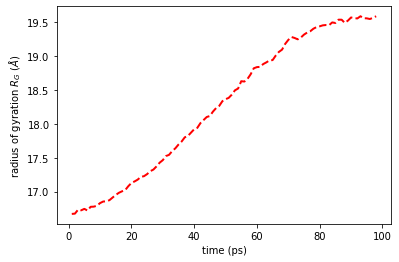

In [8]:
%matplotlib inline

# Plotting radius of gyration

import numpy as np

Rgyr = []
protein = u.select_atoms("protein")
for ts in u.trajectory:
   Rgyr.append((u.trajectory.time, protein.radius_of_gyration()))
Rgyr = np.array(Rgyr)

import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
plt.show()

In [ ]:
%matplotlib inline

from numpy.linalg import norm

def theta_NMP(u):
    """Calculate the NMP-CORE angle for E. coli AdK in degrees"""
    C = u.select_atoms("resid 115-125 and (backbone or name CB)").center_of_geometry()
    B = u.select_atoms("resid 90-100 and (backbone or name CB)").center_of_geometry()
    A = u.select_atoms("resid 35-55 and (backbone or name CB)").center_of_geometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

def theta_LID(u):
    """Calculate the LID-CORE angle for E. coli AdK in degrees"""
    C = u.select_atoms("resid 179-185 and (backbone or name CB)").center_of_geometry()
    B = u.select_atoms("resid 115-125 and (backbone or name CB)").center_of_geometry()
    A = u.select_atoms("resid 125-153 and (backbone or name CB)").center_of_geometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

